# Exercise M1.1:  State space model 

In this exercise you are studying the linear state space model that was introduced in the lectures. In the next exercise, you will then apply the Kalman filter to simulations of the state space model.

First, please revise the definition of the linear state space model with additive Gaussian noise as it was introduced in the lectures. The code in the cell below simulates the evolution of a 1-dimensional state and corresponding obvservations according to this model using the following values for the model parameters:

$F = 1, B = 0, Q = 1, H = 1, R = 1$

Please make sure that you understand the meaning of the model parameters. 

The code in the cell below simulates the state space model for $T=100$ time steps and stores the resulting states and obervations in the arrays $x$ and $y$ respectively. Please make sure you understand the code. 

1. Please run the code below multiple times and explain why the resulting graphs look as they do.
2. Please compute the Pearson correlation coefficient between the measurements and the states (you can use the function 'corrcoef' from numpy for multple simulations. Which model parameter do you have to change to increase the correlation between measurements and the states? Please try it out.
3. Set the value of the model parameters that you changed in 2. back to its original value. Then, modify the code to simulate the state space model with a constant control input of magnitude 0.5. Please explain the resulting graphs and their differences to the graphs obtained in 1.



Meaning of model parameters:

- $F$: transition matrix for transition from state at $t-1$ to state at $t$
- $B$: control input matrix for effect of current control on state
- $Q$: state transition noise
- $H$: matrix that transforms state into measurement domain
- $R$: measurement noise

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

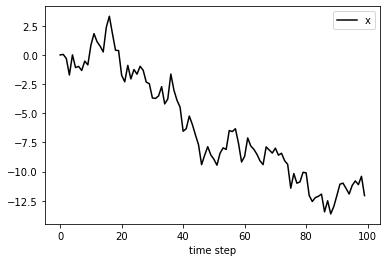

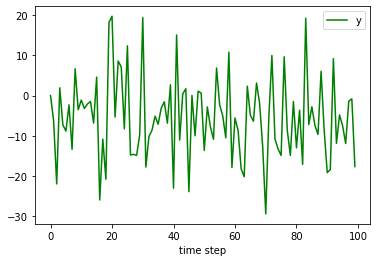

In [1]:
import numpy as np
from matplotlib import pylab as plt

def simulateStateSpaceModel(T,F,B,Q,H,R,u):
    # generate evolution of real state and measurements
    #
    # input parameters:
    # T - number of time steps
    # F,B,Q,H,R - parameters of state space model
    # u - controls
    #
    # return:
    # x - state
    # y - measurements
    #
    
    x=np.zeros([1,T]) # state 
    y=np.zeros([1,T]) # measurement

    for t in range(T-1):
        x[:,t+1]=F*x[:,t]+B*u[:,t]+np.random.normal(scale=Q)
        y[:,t+1]=H*x[:,t+1]+np.random.normal(scale=R)
        
    return x,y


def plotStateAndMeasurements(ti,x,y):
    # plot evolution of states and measurements over time
    #
    # input parameters:
    # ti - index of time steps
    # x - states
    # y - measurements
    #
    # return:
    # f1 - handle to figure with graph of states
    # f2 - handle to figure with graph of measurements
    #    

    f1=plt.figure()
    plt.plot(ti,x.T,'k-',label='x')
    plt.xlabel('time step')
    plt.legend()
    f2=plt.figure()
    plt.plot(ti,y.T,'g-',label='y')
    plt.xlabel('time step')
    plt.legend()
    
    return f1,f2

    



# paramaters of state space model
F=np.array([[1]])
B=np.array([[0]])
Q=np.array([[1]])
H=np.array([[1]])
R=np.array([[10]])

# number of time steps
T=100

# time index array
ti=np.array([range(100)]).T

# control signals
u=np.zeros([1,T])

# simulate state space model
x,y=simulateStateSpaceModel(T,F,B,Q,H,R,u)

# plot state and measurements over time 
plotStateAndMeasurements(ti,x,y)


What code does:

- simulateStateSpaceModel(T,F,B,Q,H,R,u): applies state and measurement equations
- plotStateAndMeasurements(ti,x,y): plots states and measurements over time
- stimulation for 100 time steps with $F = 1, B = 0, Q = 1, H = 1, R = 10$ and no controls applied

1. Please run the code below multiple times and explain why the resulting graphs look as they do.

- x (state): no controls applied and state transition with $F=1$ (copy of previous state) and noise of size $Q=1$ leads to a random evolution of the state over time
- y (measurement): follows the state trace but due to $R=10$ depicts a noisy version of the states

2. Please compute the Pearson correlation coefficient between the measurements and the states (you can use the function 'corrcoef' from numpy for multple simulations. Which model parameter do you have to change to increase the correlation between measurements and the states? Please try it out.

In [2]:
# paramaters of state space model
F=np.array([[1]])
B=np.array([[0]])
Q=np.array([[1]])
H=np.array([[1]])
R=np.array([[10]])

N = 100

corrs = []
for i in range(N):

    # number of time steps
    T=100

    # time index array
    ti=np.array([range(100)]).T

    # control signals
    u=np.zeros([1,T])

    # simulate state space model
    x,y=simulateStateSpaceModel(T,F,B,Q,H,R,u)

    corrs.append(np.corrcoef(x,y))

print('Average correlation betwen states and measurements:', np.mean(corrs))

Average correlation betwen states and measurements: 0.6727872944620905


Increase correlation:

- Increase $F$ (state transition)
- (currently no control applied and therefore no influence of $B$ [effect of control])
- Increase $Q$ (state transition noise)
- Increase $H$ (state to measurement transition)
- Decrease $R$ (measurement noise)

3. Set the value of the model parameters that you changed in 2. back to its original value. Then, modify the code to simulate the state space model with a constant control input of magnitude 0.5. Please explain the resulting graphs and their differences to the graphs obtained in 1.

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

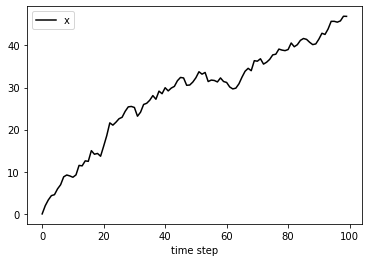

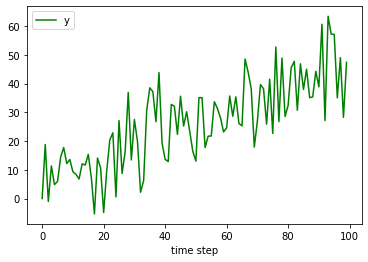

In [3]:
import numpy as np
from matplotlib import pylab as plt

def simulateStateSpaceModel(T,F,B,Q,H,R,u):
    # generate evolution of real state and measurements
    #
    # input parameters:
    # T - number of time steps
    # F,B,Q,H,R - parameters of state space model
    # u - controls
    #
    # return:
    # x - state
    # y - measurements
    #
    
    x=np.zeros([1,T]) # state 
    y=np.zeros([1,T]) # measurement

    for t in range(T-1):
        x[:,t+1]=F*x[:,t]+B*u[:,t]+np.random.normal(scale=Q)
        y[:,t+1]=H*x[:,t+1]+np.random.normal(scale=R)
        
    return x,y


def plotStateAndMeasurements(ti,x,y):
    # plot evolution of states and measurements over time
    #
    # input parameters:
    # ti - index of time steps
    # x - states
    # y - measurements
    #
    # return:
    # f1 - handle to figure with graph of states
    # f2 - handle to figure with graph of measurements
    #    

    f1=plt.figure()
    plt.plot(ti,x.T,'k-',label='x')
    plt.xlabel('time step')
    plt.legend()
    f2=plt.figure()
    plt.plot(ti,y.T,'g-',label='y')
    plt.xlabel('time step')
    plt.legend()
    
    return f1,f2

    



# paramaters of state space model
F=np.array([[1]])
B=np.array([[1]])
Q=np.array([[1]])
H=np.array([[1]])
R=np.array([[10]])

# number of time steps
T=100

# time index array
ti=np.array([range(100)]).T

# control signals
u=np.full([1,T], 0.5)

# simulate state space model
x,y=simulateStateSpaceModel(T,F,B,Q,H,R,u)

# plot state and measurements over time 
plotStateAndMeasurements(ti,x,y)

Note: one needs to change both the vector $u$ as well as the effect of the control $B$ to obtain changes.

Now, for each time steps, 0.5 is added to the state on average but still state transition and measurement noise show their effect.

# Exercise M1.2: Kalman filter

In this exercise, you will apply the Kalman filter to simulations of the linear state space model that was investigated in exercise M1.1. 

1. Please implement a function 'Kalmanfilter" that implements the Kalman filter. The function should have the call syntax shown below. Ask for help if you have the feeling that you are stuck with the implementation.

```
def KalmanFilter(F,B,Q,H,R,x0,P0,y,T):
    #
    # Implements Kalman Filter to estimate x from observations 
    #
    # input arguments:
    # F,B,Q,H,R: parameters of the linear state space model
    # x0,P0: initial state and covariance of inital state
    # y: measurements
    # T: number of time steps
    #
    # returns:
    # xhat: estimated state
    # P: covariance of estimated state
    # K: Kalman gain
    #
```

2. Use the state space model simulation from the previouse exerise M1.1 to simulate states and measurements for $T=100$ time steps using the following model parameters: $F = 1, B = 0, Q = 1, H = 1, R = 10$. As in exercise M1.1 plot the evolution of states and measurements. Use your implementation of the Kalman filter with initial values of $x0=0$, $P0=0$. Plot the state estimated by the Kalman filter in the same plot as the true state. Interpret the resulting figure.


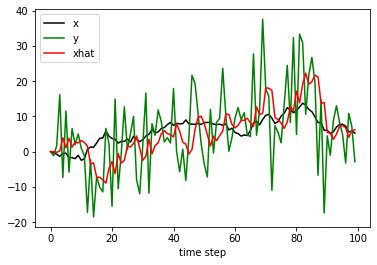

In [77]:
def KalmanFilter(F,B,Q,H,R,x0,P0,y,T):
    #
    # Implements Kalman Filter to estimate x from observations 
    #
    # input arguments:
    # F,B,Q,H,R: parameters of the linear state space model
    # x0,P0: initial state and covariance of inital state
    # y: measurements
    # T: number of time steps
    #
    # returns:
    # xhat: estimated state
    # P: covariance of estimated state
    # K: Kalman gain
    #
    
    xhat=np.zeros([1,T])
    P=np.zeros([1,1,T])
    K=np.zeros([1,1,T])

    xhat[:,0]=x0
    P[:,:,0]=P0
    for t in range(T-1):
    
        # prediction step
        x_prediction=F*xhat[:,t]+B*u[:,t]
        P_prediction=F*P[:,:,t]*F.T+Q;
    
        # computation of Kalman gain
        S=(H*P_prediction*H.T+R)
        K[:,:,t]=P_prediction*H.T*np.linalg.inv(S)
    
        # measurement update
        xhat[:,t+1]=x_prediction+K[:,:,t]*(y[:,t]-H*x_prediction)
        P[:,:,t+1]=P_prediction-K[:,:,t]*H*P_prediction
        
    return xhat,P,K


def plotStateAndMeasurementsandEstimation(ti,x,y,xhat):
    # plot evolution of states and measurements over time
    #
    # input parameters:
    # ti - index of time steps
    # x - states
    # y - measurements
    #
    # return:
    # f1 - handle to figure with graph of states
    # f2 - handle to figure with graph of measurements
    #    

    f=plt.figure()
    plt.plot(ti,x.T,'k-',label='x')
    plt.plot(ti,y.T,'g-',label='y')
    plt.plot(ti,xhat.T,'r-',label='xhat')
    plt.xlabel('time step')
    plt.legend()
    
    return f




# paramaters of state space model
F=np.array([[1]])
B=np.array([[0]])
Q=np.array([[1]])
H=np.array([[1]])
R=np.array([[10]])

# number of time steps
T=100

# time index 
ti=np.array([range(100)]).T

# control signals
u=np.zeros([1,T])

# simulate state space model
x,y=simulateStateSpaceModel(T,F,B,Q,H,R,u)


# estimate x from measurements using Kalman filter
x0=x[:,0]
P0=0*np.ones([1,1])
xhat,P,K=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)

# plot state and measurements and estimates over time 
f=plotStateAndMeasurementsandEstimation(ti,x,y,xhat)

For state estimation (xhat), the Kalman filter uses both (1) prediction of the current state from the previously estimated state and (2) measurements from the current state. Here, the measurement of the state is quite noisy which also introduces some amount of noise in state estimation. Still, through the combination of prediction and measurement, the state estimation is smoother than the measurement.

3. Try to predict how the Kalman gain and the variance of the estimate changes over time in the simulation of 2. Verify your prediction by making graphs of both and try to explain the obtained results.


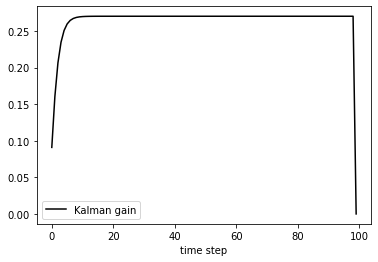

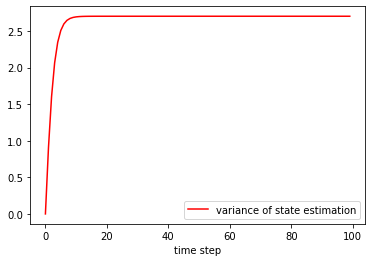

In [78]:
plt.figure()
plt.plot(ti,K[0, :, :].T,'k-',label='Kalman gain')
plt.xlabel('time step')
plt.legend()

plt.figure()
plt.plot(ti,P[0, :, :].T,'r-',label='variance of state estimation')
plt.xlabel('time step')
plt.legend()

The Kalman gain and the variance of state estimation initially are low (with the variance of the state estimation even being 0). This is because the initial state is known ($P_0 = 0$) which then also leads to a small Kalman gain because the variance of state estimation is high compared to measurement accuracy. 

Over time however, inaccuracies accumulate until the Kalman gain and variance of state estimation reach an equilibrium.

4. Try to predict how the Kalman gain and the variance of the estimated state change when you use a higher uncertainty of the initial state, e.g. $P_0=10$. Run the Kalman filter again and add graphs of the Kalman gain and the variance for $P_0=10$ to the plots from 3. Try to explain the observed results.

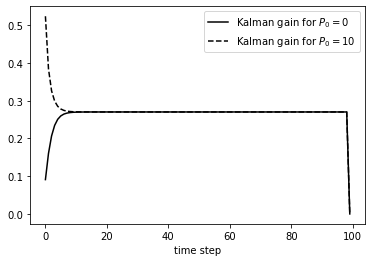

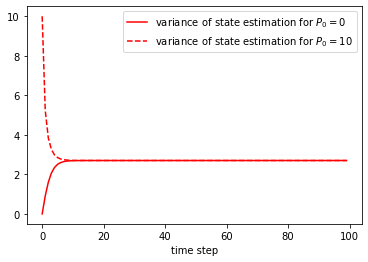

In [79]:
# p0 = 0
P0=0*np.ones([1,1])
xhat0,P_0,K0=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)

# p0 = 10
P0=10*np.ones([1,1])
xhat10,P_10,K10=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)

plt.figure()
plt.plot(ti,K0[0, :, :].T,'k-',label='Kalman gain for $P_0 = {}$'.format(0))
plt.plot(ti,K10[0, :, :].T,'k--',label='Kalman gain for $P_0 = {}$'.format(10))
plt.xlabel('time step')
plt.legend()

plt.figure()
plt.plot(ti,P_0[0, :, :].T,'r-',label='variance of state estimation for $P_0 = {}$'.format(0))
plt.plot(ti,P_10[0, :, :].T,'r--',label='variance of state estimation for $P_0 = {}$'.format(10))
plt.xlabel('time step')
plt.legend()

For $P_0=10$, the state estimation now starts with a large inaccuracy in prediction which then increases the influence of the measurement by increasing the Kalman gain. However, over time the same equilibrium is reached.

5. Try to predict how the graphs from 3. and 4. change if you decrease the measurment noise to $R=2$. Check your prediction by performing the corresponding simulations and plot their results. Try to explain the obtained results. Note, that if you change the value of the model parameter $R$ you also have to run the simulation of the state space model again.

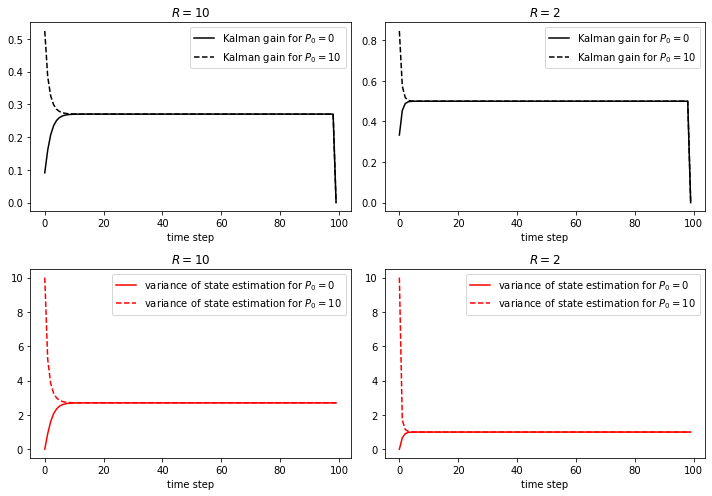

In [80]:
fig, ax = plt.subplots(2,2,figsize=(10,7))

# paramaters of state space model
F=np.array([[1]])
B=np.array([[0]])
Q=np.array([[1]])
H=np.array([[1]])
R=np.array([[10]])

# number of time steps
T=100

# time index 
ti=np.array([range(100)]).T

# control signals
u=np.zeros([1,T])

# simulate state space model
x,y=simulateStateSpaceModel(T,F,B,Q,H,R,u)

# estimate x from measurements using Kalman filter
x0=x[:,0]

# p0 = 0
P0=0*np.ones([1,1])
xhat0,P_0,K0=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)

# p0 = 10
P0=10*np.ones([1,1])
xhat10,P_10,K10=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)

ax[0,0].plot(ti,K0[0, :, :].T,'k-',label='Kalman gain for $P_0 = {}$'.format(0))
ax[0,0].plot(ti,K10[0, :, :].T,'k--',label='Kalman gain for $P_0 = {}$'.format(10))
ax[0,0].set_xlabel('time step')
ax[0,0].set_title('$R = {}$'.format(R[0][0]))
ax[0,0].legend()

ax[1,0].plot(ti,P_0[0, :, :].T,'r-',label='variance of state estimation for $P_0 = {}$'.format(0))
ax[1,0].plot(ti,P_10[0, :, :].T,'r--',label='variance of state estimation for $P_0 = {}$'.format(10))
ax[1,0].set_xlabel('time step')
ax[1,0].set_title('$R = {}$'.format(R[0][0]))
ax[1,0].legend()


# paramaters of state space model
F=np.array([[1]])
B=np.array([[0]])
Q=np.array([[1]])
H=np.array([[1]])
R=np.array([[2]])

# number of time steps
T=100

# time index 
ti=np.array([range(100)]).T

# control signals
u=np.zeros([1,T])

# simulate state space model
x,y=simulateStateSpaceModel(T,F,B,Q,H,R,u)

# estimate x from measurements using Kalman filter
x0=x[:,0]

# p0 = 0
P0=0*np.ones([1,1])
xhat0,P_0,K0=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)

# p0 = 10
P0=10*np.ones([1,1])
xhat10,P_10,K10=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)

ax[0,1].plot(ti,K0[0, :, :].T,'k-',label='Kalman gain for $P_0 = {}$'.format(0))
ax[0,1].plot(ti,K10[0, :, :].T,'k--',label='Kalman gain for $P_0 = {}$'.format(10))
ax[0,1].set_xlabel('time step')
ax[0,1].set_title('$R = {}$'.format(R[0][0]))
ax[0,1].legend()

ax[1,1].plot(ti,P_0[0, :, :].T,'r-',label='variance of state estimation for $P_0 = {}$'.format(0))
ax[1,1].plot(ti,P_10[0, :, :].T,'r--',label='variance of state estimation for $P_0 = {}$'.format(10))
ax[1,1].set_xlabel('time step')
ax[1,1].set_title('$R = {}$'.format(R[0][0]))
ax[1,1].legend()

plt.tight_layout()

Kalman gain: decreasing $R$ increases the influence of the measurement on state estimation which leads to a larger Kalman gain.

Variance of state estimation: decreasing $R$ in general leads to lower noise in state estimation.

6. Vary $R$ logarithmically between $10^{-2}$ and $10^{2}$. You can use the function 'logspace' of 'numpy' to do that. Simulate the state space model and apply the Kalman filter for the different values of $R$. Plot the stationary values of the Kalman gain and the variance over $R$ using a logarithmic x-axis and interpret the results.

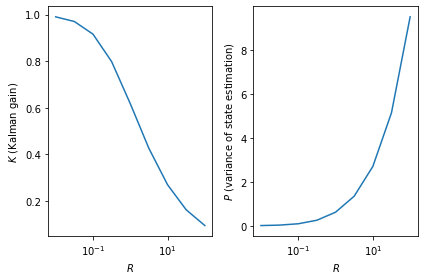

In [122]:
# paramaters of state space model
F=np.array([[1]])
B=np.array([[0]])
Q=np.array([[1]])
H=np.array([[1]])
Rs = [0.01, 10**-1.5, 0.1, 10**-0.5,1, 10**0.5, 10, 10**1.5, 100]
#Rs=np.logspace(0.01, 100, 100) # did not start from 0.01

# number of time steps
T=100

# time index 
ti=np.array([range(100)]).T

# control signals
u=np.zeros([1,T])

Ks = []
Ps = []

for i in range(len(Rs)):
    R = Rs[i]

    # simulate state space model
    x,y=simulateStateSpaceModel(T,F,B,Q,H,R,u)

    # estimate x from measurements using Kalman filter
    x0=x[:,0]

    # p0 = 0
    P0=0*np.ones([1,1])
    xhat,P,K=KalmanFilter(F,B,Q,H,R,x0,P0,y,T)
    
    Ks.append(K[0, 0, 98])
    Ps.append(P[0, 0, 98])

fig, ax = plt.subplots(1, 2)
    
ax[0].plot(Rs, Ks)
ax[0].set_xscale('log')
ax[0].set_xlabel('$R$')
ax[0].set_ylabel('$K$ (Kalman gain)')
ax[1].plot(Rs, Ps)
ax[1].set_xscale('log')
ax[1].set_xlabel('$R$')
ax[1].set_ylabel('$P$ (variance of state estimation)')
plt.tight_layout()